# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [6]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [32]:
data = pd.read_csv('/content/drive/MyDrive/14. Домашнее задание. Решение ML-задачи и kaggle/train.csv')

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

1) Посмотрим на 5 случайных строк:

In [37]:
data.sample(5)


,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
61,38,81.00,3084.9,Male,0,Yes,Yes,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
392,10,62.25,612.95,Male,0,No,No,Yes,No,DSL,Yes,No,No,Yes,Yes,No,Month-to-month,No,Bank transfer (automatic),0
659,50,20.55,1067.65,Male,0,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
3626,71,113.65,8166.8,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
2337,53,106.95,5785.5,Female,0,No,No,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),1


2) Посмотрим на всю таблицу. В ней 20 колонок и 5282 строки.

In [38]:
data

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Из таблицы выше видно, что пропущенных значений нет. Ну или вот так:

In [40]:
missing = data.isnull().sum()
print(missing)


ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64


In [44]:

data = data.replace(' ', np.nan)

data = data.dropna()


В данном пункте были найдены и исключены пустые строки.

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

# Числовые признаки

    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'


# Категориальные признаки

    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'

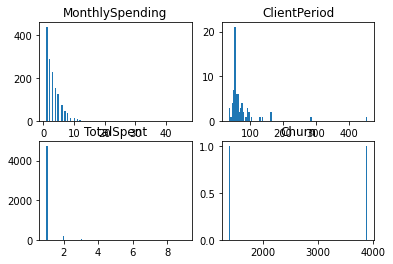

In [45]:
fig = plt.figure()
ax = fig.add_subplot(221)
ax.set(title = 'MonthlySpending')
plt.hist(data.value_counts('MonthlySpending'), bins=100)
ax= fig.add_subplot(222)
ax.set(title = 'ClientPeriod')
plt.hist(data.value_counts('ClientPeriod'), bins=100)
ax= fig.add_subplot(223)
ax.set(title = 'TotalSpent')
plt.hist(data.value_counts('TotalSpent'), bins=100)
ax= fig.add_subplot(224)
ax.set(title = 'Churn')
plt.hist(data.value_counts('Churn'), bins=100)

plt.show()

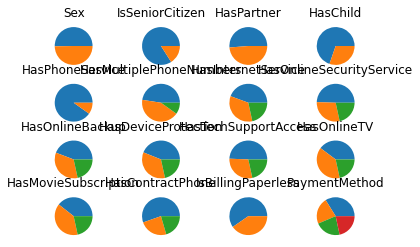

In [46]:
fig = plt.figure()
ax = fig.add_subplot(441)
ax.set(title = 'Sex')
plt.pie(data.value_counts('Sex'))
ax= fig.add_subplot(442)
ax.set(title = 'IsSeniorCitizen')
plt.pie(data.value_counts('IsSeniorCitizen'))
ax= fig.add_subplot(443)
ax.set(title = 'HasPartner')
plt.pie(data.value_counts('HasPartner'))
ax= fig.add_subplot(444)
ax.set(title = 'HasChild')
plt.pie(data.value_counts('HasChild'))
ax= fig.add_subplot(445)
ax.set(title = 'HasPhoneService')
plt.pie(data.value_counts('HasPhoneService'))
ax = fig.add_subplot(446)
ax.set(title = 'HasMultiplePhoneNumbers')
plt.pie(data.value_counts('HasMultiplePhoneNumbers'))
ax= fig.add_subplot(447)
ax.set(title = 'HasInternetService')
plt.pie(data.value_counts('HasInternetService'))
ax= fig.add_subplot(448)
ax.set(title = 'HasOnlineSecurityService')
plt.pie(data.value_counts('HasOnlineSecurityService'))
ax= fig.add_subplot(449)
ax.set(title = 'HasOnlineBackup')
plt.pie(data.value_counts('HasOnlineBackup'))
ax= fig.add_subplot(4, 4, 10)
ax.set(title = 'HasDeviceProtection')
plt.pie(data.value_counts('HasDeviceProtection'))
ax= fig.add_subplot(4, 4, 11)
ax.set(title = 'HasTechSupportAccess')
plt.pie(data.value_counts('HasTechSupportAccess'))
ax= fig.add_subplot(4, 4, 12)
ax.set(title = 'HasOnlineTV')
plt.pie(data.value_counts('HasOnlineTV'))
ax= fig.add_subplot(4, 4, 13)
ax.set(title = 'HasMovieSubscription')
plt.pie(data.value_counts('HasMovieSubscription'))
ax= fig.add_subplot(4, 4, 14)
ax.set(title = 'HasContractPhone')
plt.pie(data.value_counts('HasContractPhone'))
ax= fig.add_subplot(4, 4, 15)
ax.set(title = 'IsBillingPaperless')
plt.pie(data.value_counts('IsBillingPaperless'))
ax= fig.add_subplot(4, 4, 16)
ax.set(title = 'PaymentMethod')
plt.pie(data.value_counts('PaymentMethod'))

plt.show()

Из графика (о целевой переменной churn), приведенного выше, можно сделать вывод о несбалансированности классов.

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [47]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [64]:
scaler = StandardScaler()
numeric_data = scaler.fit_transform(data[num_cols])
numeric_data =pd.DataFrame(numeric_data)
categorial_data = data[cat_cols]
dummy_features = pd.get_dummies(categorial_data)
X = np.hstack([numeric_data, dummy_features])
X=pd.DataFrame(X)
X_origin = data.iloc[:, :-1]
y = data['Churn']




In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, train_size=0.8, random_state=42)

train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(
    X, y, test_size=0.2, random_state=42)

clf = LogisticRegression(solver='lbfgs')

param_grid = {
    'C': [100, 10, 1, 0.1, 0.01, 0.001]
}
search = GridSearchCV(clf, param_grid, n_jobs=-1, cv=5, refit=True, scoring='roc_auc')


search.fit(X, y)


print(search.best_params_)



{'C': 100}


In [69]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y, search.best_estimator_.predict(X))

0.7259987039181209

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

C=100, 0.72599

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [70]:
!pip install catboost

     |████████████████████████████████| 76.3 MB 21 kB/s 


In [72]:
import catboost
X_train_origin, X_test_origin, y_train, y_test= train_test_split(X_origin.values, y.values, 
                                                       train_size=0.8, 
                                                       random_state=42)
categorical_indices = [data.columns.get_loc(c) for c in cat_cols if c in data]
boosting_model =catboost.CatBoostClassifier(cat_features=categorical_indices, 
                                            random_seed=42, verbose=False)
grid={'learning_rate': np.arange(0.01, 0.2, 0.01),
      'depth': [2, 4, 6, 8, 10],
      'l2_leaf_reg': [1, 3, 5, 7, 9],
      'iterations' : [100, 200, 300]} 
grid_search_result = boosting_model.grid_search(grid, X_train_origin, y_train, plot=True, refit=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Выходные данные были обрезаны до нескольких последних строк (5000).
bestTest = 0.4079062213
bestIteration = 76

428:	loss: 0.4079062	best: 0.4037177 (180)	total: 5m 55s	remaining: 13m 44s

bestTest = 0.4070835642
bestIteration = 112

429:	loss: 0.4070836	best: 0.4037177 (180)	total: 5m 56s	remaining: 13m 46s

bestTest = 0.4052888095
bestIteration = 64

430:	loss: 0.4052888	best: 0.4037177 (180)	total: 5m 58s	remaining: 13m 47s

bestTest = 0.4062393081
bestIteration = 99

431:	loss: 0.4062393	best: 0.4037177 (180)	total: 6m	remaining: 13m 48s

bestTest = 0.4068488647
bestIteration = 58

432:	loss: 0.4068489	best: 0.4037177 (180)	total: 6m 2s	remaining: 13m 49s

bestTest = 0.4056034456
bestIteration = 73

433:	loss: 0.4056034	best: 0.4037177 (180)	total: 6m 3s	remaining: 13m 50s

bestTest = 0.4061519607
bestIteration = 98

434:	loss: 0.4061520	best: 0.4037177 (180)	total: 6m 5s	remaining: 13m 51s

bestTest = 0.4071122323
bestIteration = 39

435:	loss: 0.4071122	best: 0.4037177 (180)	tota

In [73]:
grid_search_result['params']

{'depth': 2, 'iterations': 200, 'l2_leaf_reg': 9, 'learning_rate': 0.1}

In [74]:
import catboost 
best_boosting_model = catboost.CatBoostClassifier(iterations = 200, learning_rate = 0.1, depth = 2, l2_leaf_reg = 9, cat_features=categorical_indices)
best_boosting_model.fit(X_train_origin, y_train)
y_train_predicted = best_boosting_model.predict_proba(X_train_origin)[:, 1]
y_test_predicted = best_boosting_model.predict_proba(X_test_origin)[:, 1]

0:	learn: 0.6474209	total: 10.2ms	remaining: 2.03s
1:	learn: 0.6131983	total: 16.5ms	remaining: 1.64s
2:	learn: 0.5835306	total: 21.3ms	remaining: 1.4s
3:	learn: 0.5605272	total: 25.5ms	remaining: 1.25s
4:	learn: 0.5403218	total: 30.1ms	remaining: 1.18s
5:	learn: 0.5254459	total: 34.8ms	remaining: 1.12s
6:	learn: 0.5151046	total: 39.6ms	remaining: 1.09s
7:	learn: 0.5052524	total: 44.2ms	remaining: 1.06s
8:	learn: 0.4968901	total: 48.7ms	remaining: 1.03s
9:	learn: 0.4832057	total: 53.5ms	remaining: 1.02s
10:	learn: 0.4717341	total: 58.3ms	remaining: 1s
11:	learn: 0.4629596	total: 62.2ms	remaining: 975ms
12:	learn: 0.4565889	total: 66.6ms	remaining: 958ms
13:	learn: 0.4517920	total: 70.4ms	remaining: 936ms
14:	learn: 0.4478250	total: 74.7ms	remaining: 921ms
15:	learn: 0.4432832	total: 78.7ms	remaining: 905ms
16:	learn: 0.4398358	total: 83.3ms	remaining: 896ms
17:	learn: 0.4378057	total: 87.8ms	remaining: 888ms
18:	learn: 0.4354019	total: 92ms	remaining: 877ms
19:	learn: 0.4335547	total: 

# Предсказания

In [75]:
best_model =best_boosting_model
best_model.fit(X_train_origin, y_train)
y_train_predicted = best_model.predict_proba(X_train_origin)[:, 1]
y_test_predicted = best_model.predict_proba(X_test_origin)[:, 1]


0:	learn: 0.6474209	total: 5.5ms	remaining: 1.09s
1:	learn: 0.6131983	total: 10.9ms	remaining: 1.08s
2:	learn: 0.5835306	total: 15.1ms	remaining: 993ms
3:	learn: 0.5605272	total: 19.2ms	remaining: 942ms
4:	learn: 0.5403218	total: 23.9ms	remaining: 931ms
5:	learn: 0.5254459	total: 28.6ms	remaining: 924ms
6:	learn: 0.5151046	total: 33.7ms	remaining: 928ms
7:	learn: 0.5052524	total: 40.8ms	remaining: 980ms
8:	learn: 0.4968901	total: 45.5ms	remaining: 965ms
9:	learn: 0.4832057	total: 50.2ms	remaining: 953ms
10:	learn: 0.4717341	total: 54.6ms	remaining: 939ms
11:	learn: 0.4629596	total: 58.8ms	remaining: 921ms
12:	learn: 0.4565889	total: 63ms	remaining: 906ms
13:	learn: 0.4517920	total: 66.8ms	remaining: 887ms
14:	learn: 0.4478250	total: 71ms	remaining: 875ms
15:	learn: 0.4432832	total: 75.1ms	remaining: 864ms
16:	learn: 0.4398358	total: 79.5ms	remaining: 855ms
17:	learn: 0.4378057	total: 83.8ms	remaining: 847ms
18:	learn: 0.4354019	total: 87.9ms	remaining: 838ms
19:	learn: 0.4335547	total:

In [77]:
X_test = pd.read_csv('/content/drive/MyDrive/14. Домашнее задание. Решение ML-задачи и kaggle/test.csv')
X_test = X_test.replace(' ', float('0'))
X_test = X_test.replace('?', float('0'))
X_test['TotalSpent'] = X_test['TotalSpent'].astype(float)


submission = pd.read_csv('/content/drive/MyDrive/14. Домашнее задание. Решение ML-задачи и kaggle/submission.csv')
submission[target_col] = best_model.predict_proba(X_test)[:, 1]
#submission['Churn'] = best_model.predict_proba(X_test)
submission.to_csv('/content/drive/MyDrive/HEYHEYHEY8.csv', index=False)
print(submission)


        Id     Churn
0        0  0.037790
1        1  0.727858
2        2  0.649229
3        3  0.018115
4        4  0.005978
...    ...       ...
1756  1756  0.114347
1757  1757  0.024363
1758  1758  0.852662
1759  1759  0.557182
1760  1760  0.015354

[1761 rows x 2 columns]


# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.